The **California Housing dataset** is a classic real-world dataset built into Scikit-learn (`sklearn.datasets`), commonly used as a benchmark for **regression** tasks.

It contains data from the 1990 U.S. Census, with each row representing one "block group" (the smallest geographical unit for which the Census Bureau publishes data, typically containing 600 to 3,000 people).

---


## 4. How to load it in Python

You can load it directly into a Pandas DataFrame using this snippet:

```python
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Fetch the data
housing = fetch_california_housing()

# Convert to DataFrame for easier viewing
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

print(df.head())

```

---

### Key Characteristics to Watch For

* **No Missing Values:** Unlike many real-world datasets, this version from Scikit-learn has no missing (null) values.
* **Scale:** Features like `Population` have much higher values than `MedInc`. You should almost always use **Feature Scaling** (like `StandardScaler`) before training a model on this data.
* **Geographic Clusters:** Because it includes latitude and longitude, the data often shows high-value clusters near the coast (San Francisco, Los Angeles).

Would you like to see how to build a **Linear Regression** model to predict prices using this specific dataset?

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset from scikit-learn
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()

In [3]:
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
# Input Features
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
# Output feature
dataset.target_names

['MedHouseVal']

In [7]:
# Dataset Description
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [8]:
# Feature values/data
print(dataset.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [9]:
# target column 'MedHouseVal' data/values
print(dataset.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


##### 1. Dataset Overview

* **Goal:** Predict the **median house value** for California districts.
* **Samples:** 20,640 instances.
* **Features:** 8 numeric attributes.
* **Target:** 1 numeric value (Median House Value).

---

##### 2. The Attributes (Features)

The dataset includes demographic information and geographic coordinates:

- MedInc        median income in block group
- HouseAge      median house age in block group
- AveRooms      average number of rooms per household
- AveBedrms     average number of bedrooms per household
- Population    block group population
- AveOccup      average number of household members
- Latitude      block group latitude
- Longitude     block group longitude

---

##### 3. The Target Variable

The target is **`MedHouseVal`** (Median House Value).

* It is expressed in **hundreds of thousands of dollars** (e.g., a value of `4.5` represents ).
* **Important Note:** The house value is **capped at 5.0** ( ). Any district with a value higher than that is simply recorded as 5.0, which can create a "ceiling" effect in your machine learning models.

---

In [10]:
# Let's prepare the dataset from all this information

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
# Add the output feature to these input features
df['MedHouseValue'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
## Perform Basic EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
df.isnull().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

In [14]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


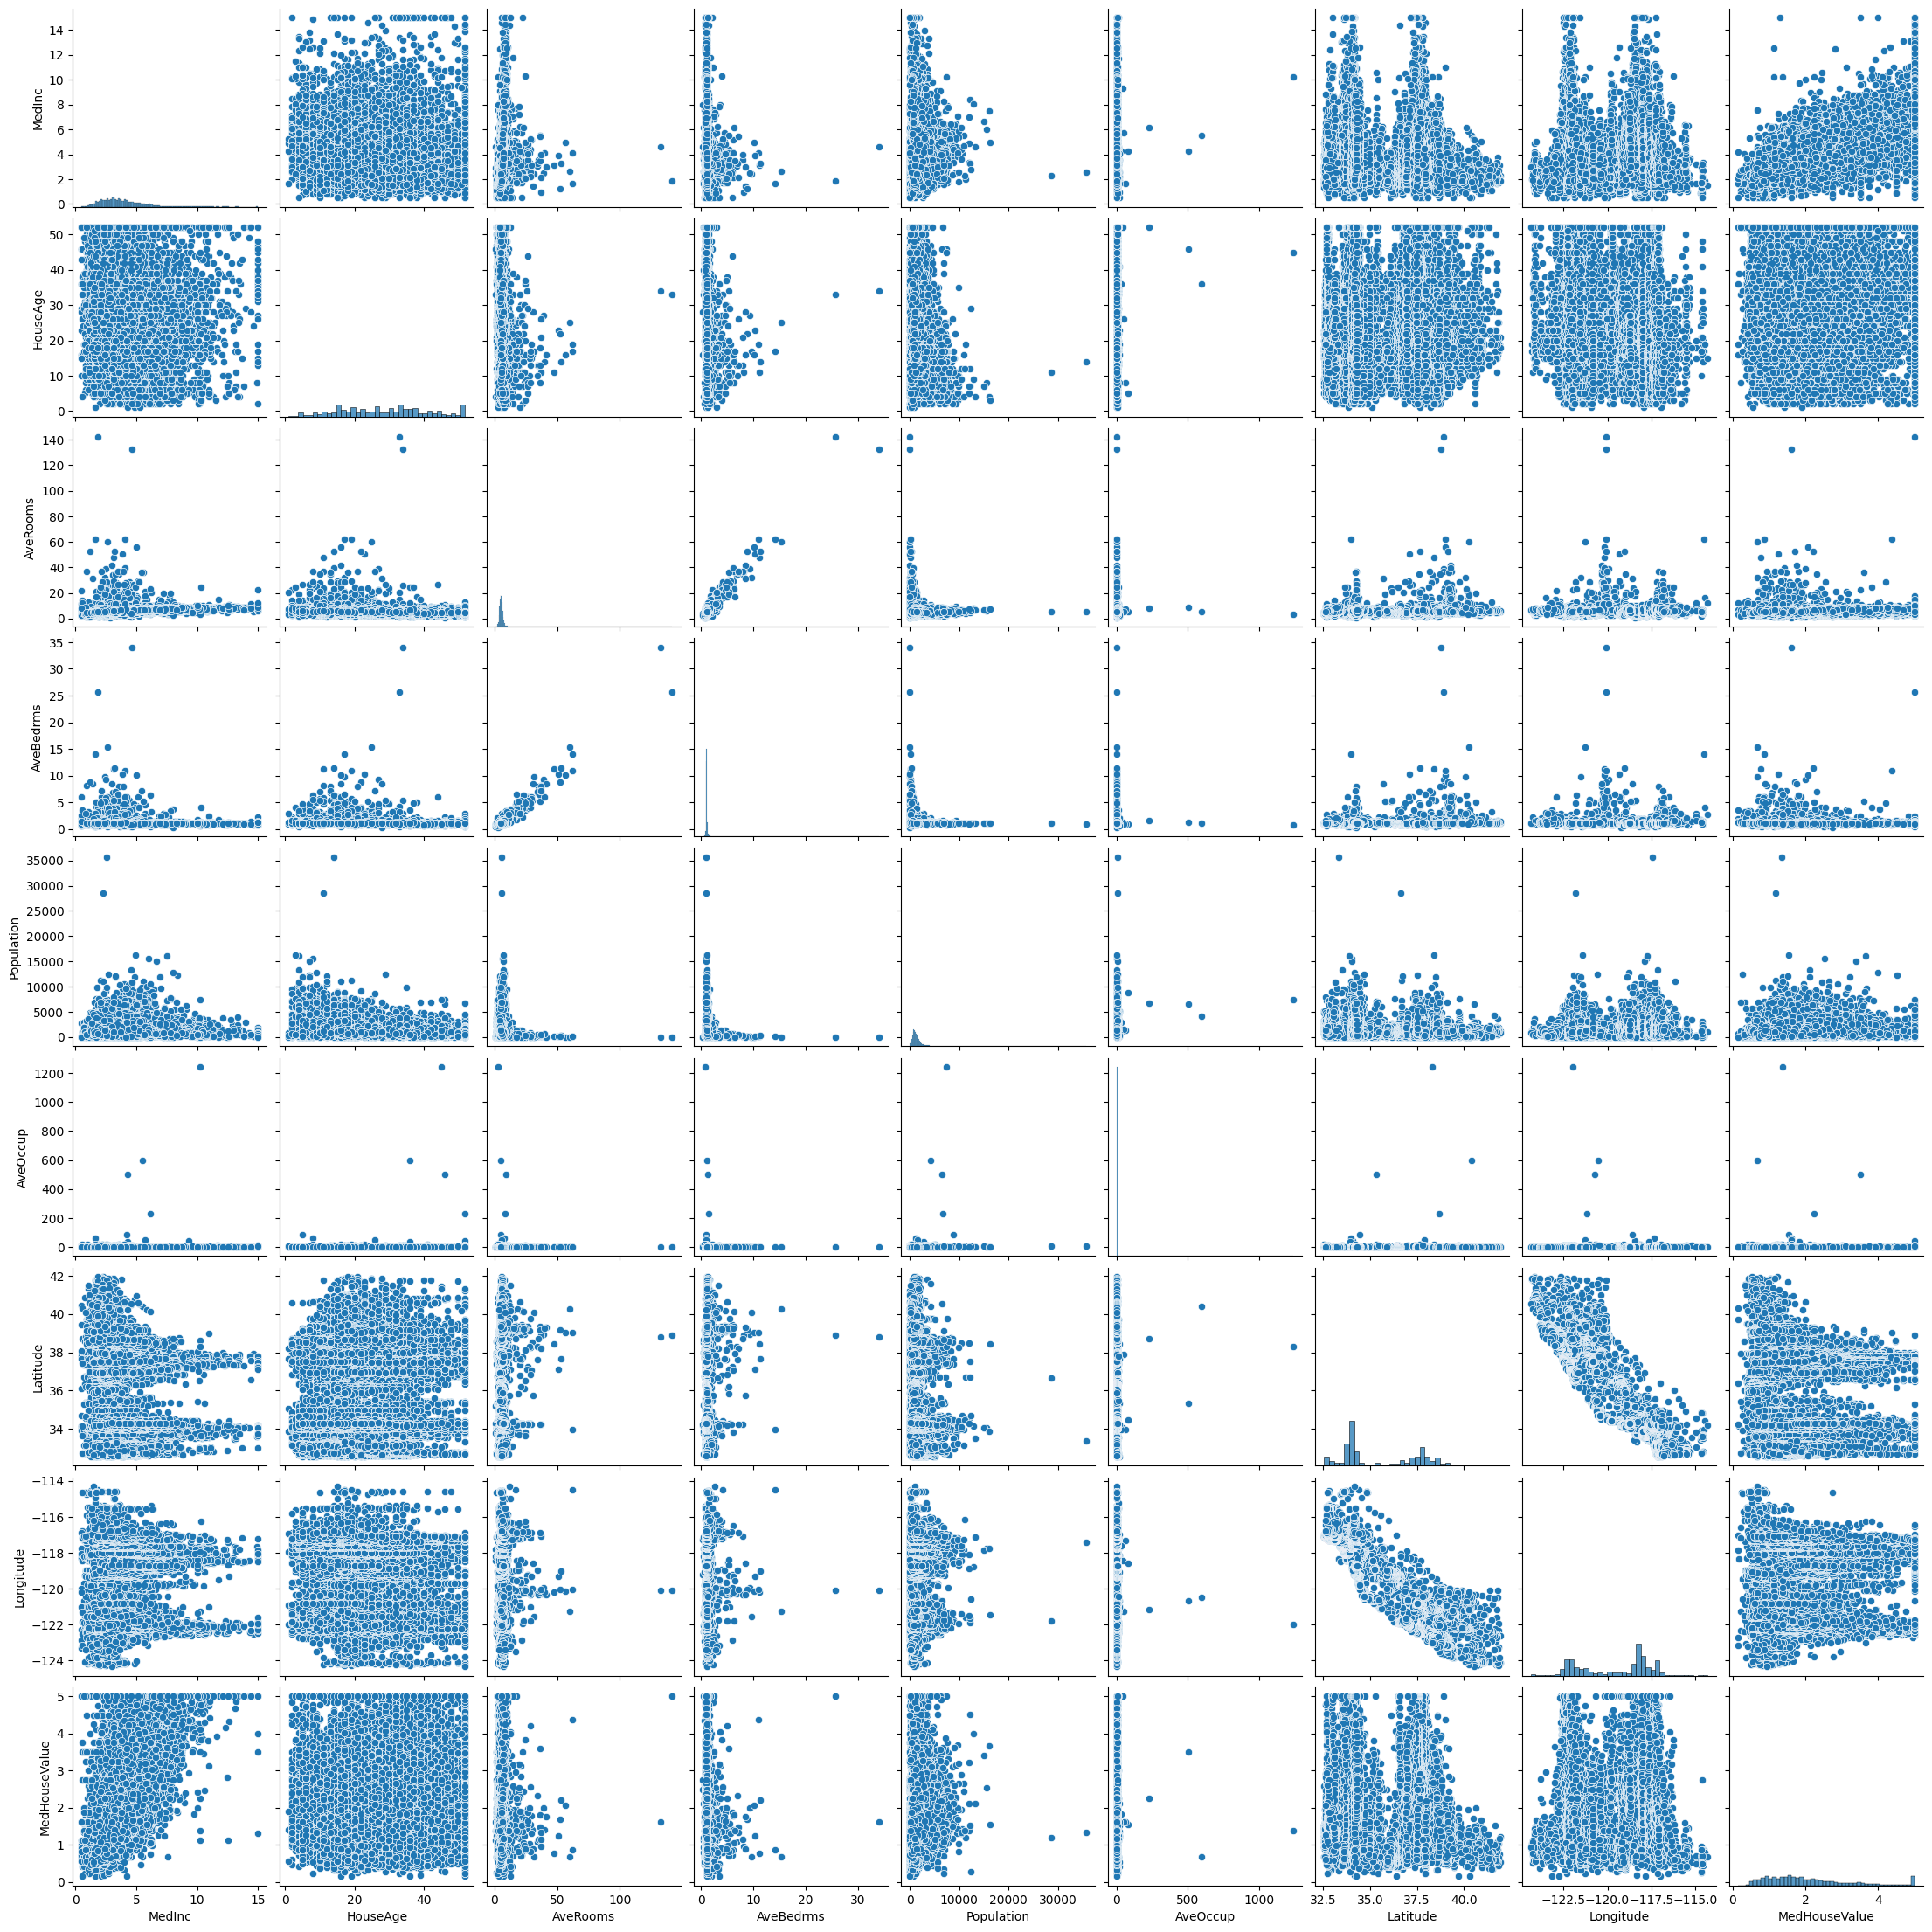

In [15]:
sns.pairplot(data=df)
plt.show()

In [16]:
# Understand correlation an important step in linear regression
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseValue,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

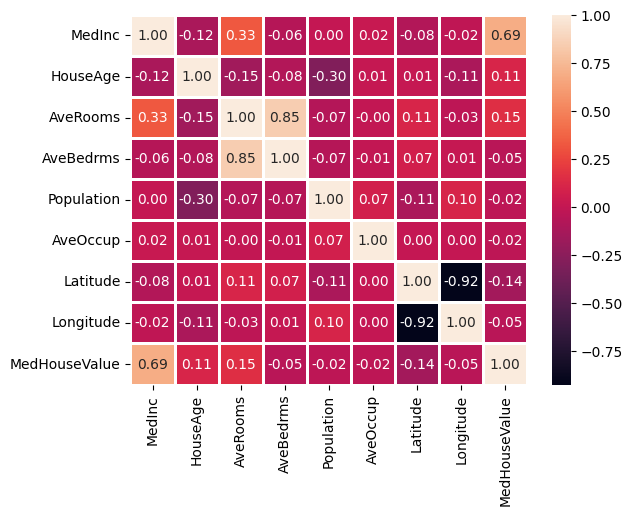

In [19]:
# Plot the correlation using heatmap
sns.heatmap(data=df.corr(), annot=True, fmt='.2f', linecolor='white', linewidths=2)

In [20]:
# Divide the dataset as independent and dependent features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [22]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseValue, dtype: float64

In [23]:
# Train-Test split
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [25]:
print(f'The Dataset originally had {X.shape} rows. After the split data got divided into 2 parts Training Dataset (67%) and Testing Dataset (33%)')
print(f'X Train: {X_train.shape}')
print(f'X Test: {X_test.shape}')
print(f'y Train: {y_train.shape}')
print(f'y Test: {y_test.shape}')

The Dataset originally had (20640, 8) rows. After the split data got divided into 2 parts Training Dataset (67%) and Testing Dataset (33%)
X Train: (13828, 8)
X Test: (6812, 8)
y Train: (13828,)
y Test: (6812,)


In [26]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_scaled, X_test_scaled

(array([[-0.72986836,  1.22081889, -0.70305988, ...,  0.05861244,
          0.96929441, -1.43979718],
        [-0.61046678, -0.28439808,  0.07828001, ...,  0.13015917,
         -0.75823526,  1.08204942],
        [ 0.00784578, -0.60128586, -0.2447376 , ..., -0.09793279,
          0.94594941, -1.2454256 ],
        ...,
        [ 0.88684913, -1.78961504, -0.21300658, ...,  0.09549475,
          0.78720344, -1.10587678],
        [-0.87672223,  0.50782138, -1.10043274, ...,  0.18513096,
         -0.77224225,  0.66838683],
        [-0.62742573, -0.99739558, -0.60483749, ..., -0.08418874,
          0.77786545, -1.15073176]], shape=(13828, 8)),
 array([[ 0.75154854, -1.31428337, -0.39376169, ...,  0.12606697,
         -0.68820027,  0.19491761],
        [ 0.05935857, -0.12595418, -0.33070668, ..., -0.12021013,
          0.89459042, -1.36503888],
        [ 0.34405687, -1.31428337, -0.41007104, ..., -0.15581759,
         -0.91698123,  0.89764561],
        ...,
        [ 0.36483158,  0.27015554,  

In [32]:
# Train the model
from sklearn.linear_model import LinearRegression

In [33]:
linreg = LinearRegression()

In [34]:
linreg.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
# slope
print(f'Slope or Coefficient: {linreg.coef_}')

Slope or Coefficient: [ 0.82872299  0.1231163  -0.27068752  0.32859106  0.00213572 -0.02810091
 -0.93017985 -0.89505497]


In [36]:
# intercept
print(f'Intercept: {linreg.intercept_}')

Intercept: 2.0634768086491158


In [38]:
# Predict the values for test dataset
y_pred = linreg.predict(X_test_scaled)

In [40]:
y_pred

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012], shape=(6812,))

In [41]:
# Performance Metrices
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.5371056943007961


In [43]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.5522332399363619


In [44]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.7431239734636219


In [45]:
# Calculate model accuracry using r2 and adjusted r2
score = r2_score(y_test, y_pred)
print(f'Model Accuracy: {score}')

Model Accuracy: 0.593595852643664


In [46]:
# Adjusted r2 = 1 - (1 - score) * (len(y_test)  - 1)/ (len(y_test) - X_test.shape[1] -1)
adj_r2 = 1 - (1 - score) * (len(y_test)  - 1)/ (len(y_test) - X_test.shape[1] -1)
print(f'Adjusted Accuracy : {adj_r2}')

Adjusted Accuracy : 0.5931179409607519


---

##### Assumptions for linear regression

*When can we say that our model performed well?*

1. When we plot our true points `y_test` and predicted points `y_pred` along a scatter plot or a line plot and we see an linear distribution then we can say our model performed well. The linear the relationship the better the model performance.

Example:

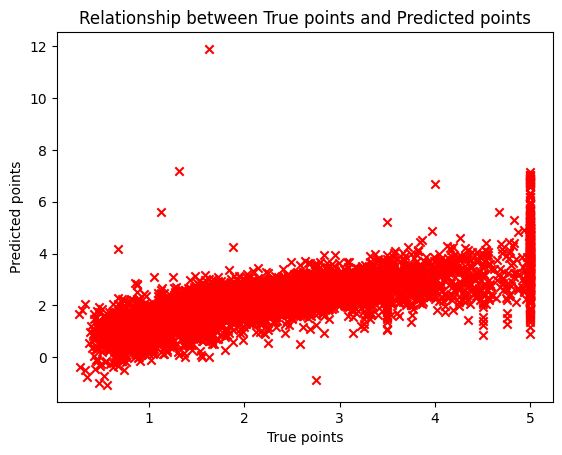

In [48]:
plt.scatter(y_test, y_pred, color='red', marker='x')
plt.title('Relationship between True points and Predicted points')
plt.xlabel('True points')
plt.ylabel('Predicted points')
plt.show()

2. When we calculate the residual,  plot it using a kde plot, and we see an normal distribution then our model performed well. The more normal the distribution the better the model performance.

Example:

In [49]:
residuals = y_test - y_pred

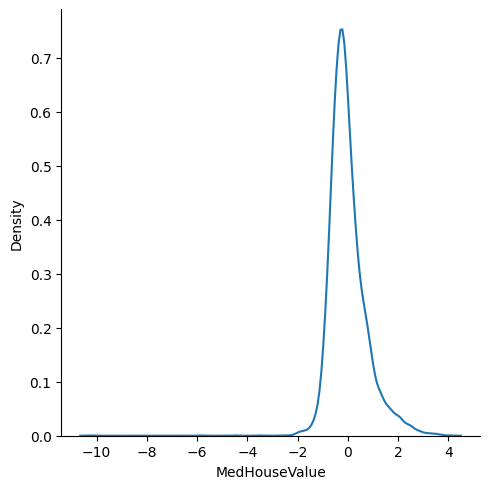

In [50]:
sns.displot(residuals, kind='kde')

3. When we plot predicted points agains residuals in a scatter plot and we see an uniform distribution then we can say the model performed well. The uniform the distribution the better the model performance.

Example:

<function matplotlib.pyplot.show(close=None, block=None)>

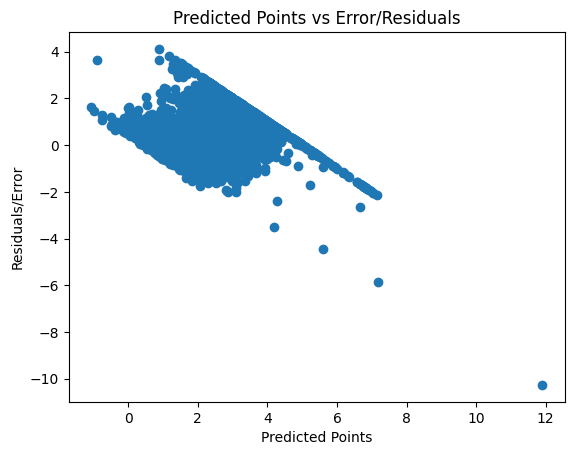

In [51]:
plt.scatter(y_pred, residuals)
plt.title('Predicted Points vs Error/Residuals')
plt.xlabel('Predicted Points')
plt.ylabel('Residuals/Error')
plt.show

---

#### Pickling

Python `pickle` module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it 'serialises' the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in python script.

In [52]:
import pickle

pickle.dump(linreg, open('regressor.pkl', 'wb'))